<a href="https://colab.research.google.com/github/m4cneto/puc_mvp_09_2024/blob/main/puc_mvp_09_2024_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação de libs que serão utilizadas no notebook

In [1]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

## Carga do dataset

O Dataset utilizado é do Data Hackers, State of Data de 2023

In [2]:
# Carregar o dataset em um dataframe
url_dataset = 'https://raw.githubusercontent.com/m4cneto/puc_mvp_09_2024/main/dataset/State_of_data_BR_2023_Kaggle_df_survey_2023.csv'
df = pd.read_csv(url_dataset, delimiter = ',')


## Tratamento dos dados da raw

In [3]:
# Pegando as colunas do df
colunas = df.columns

# Convertendo o index para df
df_colunas = pd.DataFrame(colunas, columns=['Colunas'])

# Exportando para CSV, para escolher quais colunas analisar
df_colunas.to_csv('columns.csv', index=False, encoding='utf-8', sep=',')

In [4]:
# Filtrando chaves escolhidas para analise (campos do dataset que vamos usar para analisar os dados)
chaves = ['P1_a_1', 'P1_b', 'P1_l', 'P2_g', 'P2_h', 'P2_i']

# Função para extrair os valores das chaves
def extrair_valor(coluna):
    if any(chave in coluna for chave in chaves):
        partes = coluna.strip("()").split(", ")
        if len(partes) > 1:
            return partes[1].strip("'")
    return None

In [5]:
# Filtrar e renomear as colunas do dataframe
novos_nomes = {col: extrair_valor(col) for col in df.columns}
colunas_selecionadas = [col for col in df.columns if extrair_valor(col) is not None]

# Renomear as colunas e criar o dataframe principal
df_raw = df[colunas_selecionadas].rename(columns={col: novos_nomes[col] for col in colunas_selecionadas})

df_raw.head()

,Faixa idade,Genero,Nivel de Ensino,Nivel,Faixa salarial,Quanto tempo de experiência na área de dados você tem?
0,30-34,Masculino,Doutorado ou Phd,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos
1,30-34,Masculino,Graduação/Bacharelado,Pleno,de R$ 6.001/mês a R$ 8.000/mês,de 3 a 4 anos
2,35-39,Feminino,Graduação/Bacharelado,Júnior,de R$ 6.001/mês a R$ 8.000/mês,de 1 a 2 anos
3,22-24,Masculino,Estudante de Graduação,NaN,NaN,NaN
4,30-34,Masculino,Doutorado ou Phd,Júnior,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano


In [6]:
#Removendo valores nulos\NaN
df_raw = df_raw.dropna()
df_raw.head()

,Faixa idade,Genero,Nivel de Ensino,Nivel,Faixa salarial,Quanto tempo de experiência na área de dados você tem?
0,30-34,Masculino,Doutorado ou Phd,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos
1,30-34,Masculino,Graduação/Bacharelado,Pleno,de R$ 6.001/mês a R$ 8.000/mês,de 3 a 4 anos
2,35-39,Feminino,Graduação/Bacharelado,Júnior,de R$ 6.001/mês a R$ 8.000/mês,de 1 a 2 anos
4,30-34,Masculino,Doutorado ou Phd,Júnior,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano
5,30-34,Masculino,Estudante de Graduação,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos


In [7]:
# Renomeando coluna
df_raw.rename(columns={
    'Quanto tempo de experiência na área de dados você tem?': 'Tempo Experiencia'
}, inplace=True)

df_raw.columns

Index(['Faixa idade', 'Genero', 'Nivel de Ensino', 'Nivel', 'Faixa salarial',
       'Tempo Experiencia'],
      dtype='object')

In [8]:
# Substituindo valores da coluna Tempo Experiencia

de_para = {
    'Menos de 1 ano': '0-1',
    'de 1 a 2 anos': '1-2',
    'de 3 a 4 anos': '3-4',
    'de 4 a 6 anos': '4-6',
    'de 5 a 6 anos': '5-6',
    'de 7 a 10 anos': '7-10',
    'Mais de 10 anos': '10+',
    'Não tenho experiência na área de dados': '0'
}


df_raw['Tempo Experiencia'] = df_raw['Tempo Experiencia'].replace(de_para)
df_raw.head()

,Faixa idade,Genero,Nivel de Ensino,Nivel,Faixa salarial,Tempo Experiencia
0,30-34,Masculino,Doutorado ou Phd,Sênior,de R$ 12.001/mês a R$ 16.000/mês,3-4
1,30-34,Masculino,Graduação/Bacharelado,Pleno,de R$ 6.001/mês a R$ 8.000/mês,3-4
2,35-39,Feminino,Graduação/Bacharelado,Júnior,de R$ 6.001/mês a R$ 8.000/mês,1-2
4,30-34,Masculino,Doutorado ou Phd,Júnior,de R$ 4.001/mês a R$ 6.000/mês,0-1
5,30-34,Masculino,Estudante de Graduação,Pleno,de R$ 8.001/mês a R$ 12.000/mês,1-2


In [9]:
# Função para manter apenas o range faixa salarial da coluna Faixa Salarial
def extrair_intervalo(s):
    partes = s.replace('de R$ ', '').replace(' a R$ ', '-').replace('/mês', '').replace('.', '')
    if '-' in partes:
        return partes
    return None

# Aplicando a função extrair_intervalo na coluna 'Faixa salarial'
df_raw.loc[:, 'Faixa salarial'] = df_raw['Faixa salarial'].apply(extrair_intervalo)

# Removendo linhas onde 'Faixa salarial' é NaN
df_raw = df_raw.dropna(subset=['Faixa salarial'])

df_raw.tail()

,Faixa idade,Genero,Nivel de Ensino,Nivel,Faixa salarial,Tempo Experiencia
5285,25-29,Feminino,Graduação/Bacharelado,Pleno,8001-12000,3-4
5286,35-39,Masculino,Pós-graduação,Sênior,12001-16000,5-6
5287,25-29,Masculino,Graduação/Bacharelado,Júnior,8001-12000,1-2
5289,30-34,Masculino,Graduação/Bacharelado,Pleno,8001-12000,4-6
5290,25-29,Masculino,Graduação/Bacharelado,Sênior,8001-12000,1-2


In [10]:
#Copiando o df_raw para o df_main
df_main = df_raw
df_main.head()

,Faixa idade,Genero,Nivel de Ensino,Nivel,Faixa salarial,Tempo Experiencia
0,30-34,Masculino,Doutorado ou Phd,Sênior,12001-16000,3-4
1,30-34,Masculino,Graduação/Bacharelado,Pleno,6001-8000,3-4
2,35-39,Feminino,Graduação/Bacharelado,Júnior,6001-8000,1-2
4,30-34,Masculino,Doutorado ou Phd,Júnior,4001-6000,0-1
5,30-34,Masculino,Estudante de Graduação,Pleno,8001-12000,1-2


### Análise Exploratória

#### Informações do dataset


In [11]:
df_main.head()

,Faixa idade,Genero,Nivel de Ensino,Nivel,Faixa salarial,Tempo Experiencia
0,30-34,Masculino,Doutorado ou Phd,Sênior,12001-16000,3-4
1,30-34,Masculino,Graduação/Bacharelado,Pleno,6001-8000,3-4
2,35-39,Feminino,Graduação/Bacharelado,Júnior,6001-8000,1-2
4,30-34,Masculino,Doutorado ou Phd,Júnior,4001-6000,0-1
5,30-34,Masculino,Estudante de Graduação,Pleno,8001-12000,1-2


In [12]:
# Mostra as dimensões do dataset
df_main.shape

(3804, 6)

In [13]:
# Mostra as informações do dataset
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3804 entries, 0 to 5290
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Faixa idade        3804 non-null   object
 1   Genero             3804 non-null   object
 2   Nivel de Ensino    3804 non-null   object
 3   Nivel              3804 non-null   object
 4   Faixa salarial     3804 non-null   object
 5   Tempo Experiencia  3804 non-null   object
dtypes: object(6)
memory usage: 208.0+ KB


### Analises graficas

Importação de libs e tratamento dos dados para criacao de ordenação para graficos


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import re #lib regex para ajudar na ordenação

# Ajustar o estilo dos ggrafic
sns.set(style="whitegrid")

# Função para extrair o menor valor de cada faixa salarial
def faixa(salario):
    faixa = re.findall(r'\d+', salario)
    return int(faixa[0]) if faixa else 0

# Ordenação dos valores unicos para usar nos graficos
idade_ordem = sorted(df_main['Faixa idade'].unique())
experiencia_ordem = ['0-1', '1-2', '3-4', '5-6', '7-8', '9-10', '10+']
salario_ordem = sorted(df_main['Faixa salarial'].unique(), key=faixa)
nivel_ordem = ['Júnior', 'Pleno', 'Sênior']

##### Senioridade por faixa de idade

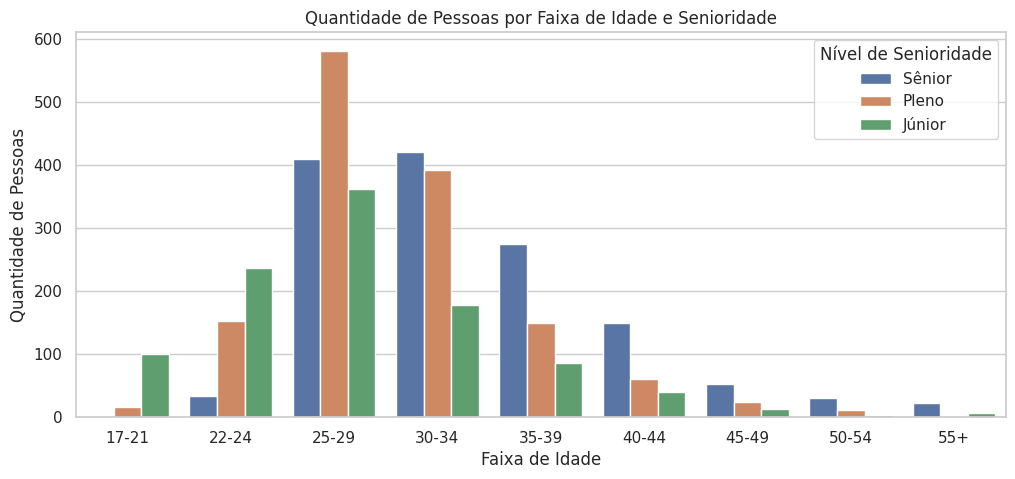

In [15]:
# Senioridade por faixa de idade
plt.figure(figsize=(12, 5))
sns.countplot(x='Faixa idade', hue='Nivel', data=df_main, order = idade_ordem)
plt.title('Quantidade de Pessoas por Faixa de Idade e Senioridade')
plt.xlabel('Faixa de Idade')
plt.ylabel('Quantidade de Pessoas')
plt.legend(title='Nível de Senioridade')

# Exibe o grafico
plt.show()


Pode-se observar que por a area de dados ser relativamente nova, a concentração de senioridade encontra-se dos 25 aos 34 anos.

##### Senioridade por tempo de experiencia

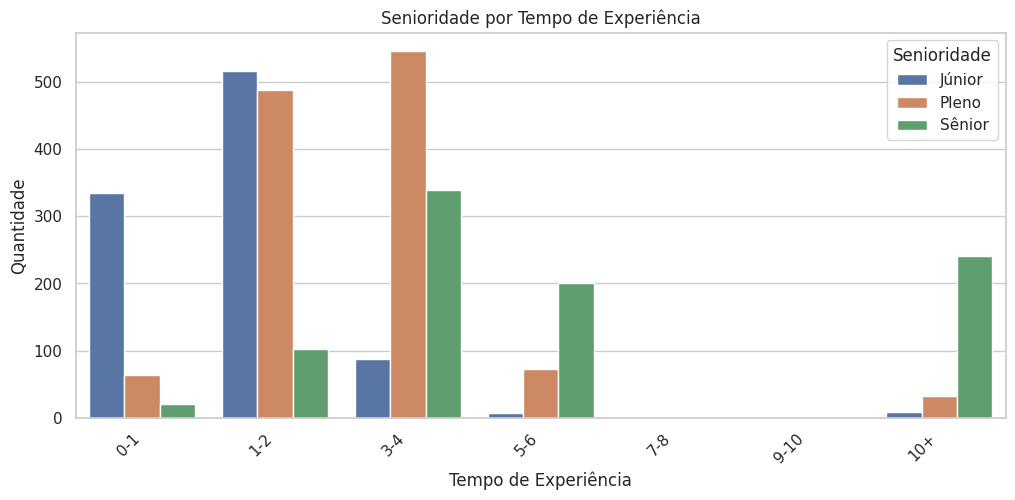

In [16]:
# Senioridade por tempo de experiencia
plt.figure(figsize=(12, 5))
sns.countplot(x='Tempo Experiencia', hue='Nivel', data=df_main, order=experiencia_ordem, hue_order=nivel_ordem)
plt.title('Senioridade por Tempo de Experiência')
plt.xlabel('Tempo de Experiência')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Senioridade')

# Exibe o grafico
plt.show()

Pode-se observar que a senioridade segue o que é esperado pelo mercado, ate 2 anos o numero de juniors é alta, entretanto, na faixa 3-4, o numero de junior despenca e a de pleno aumenta, juntamente com a de senior, o que leva acreditarmos que, esses profissionais após 2 anos de carreira foram promovidos a pleno, e os plenos, para senior.

##### Tempo de experiencia por salario

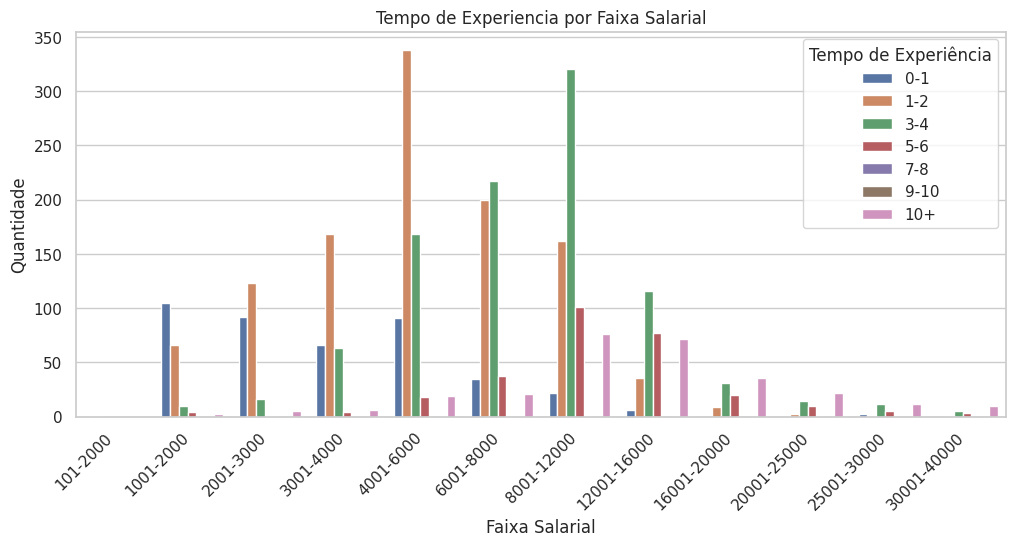

In [17]:
# Tempo de experiencia por salario
plt.figure(figsize=(12, 5))
sns.countplot(x='Faixa salarial', hue='Tempo Experiencia', data=df_main, order=salario_ordem, hue_order=experiencia_ordem)
plt.title('Tempo de Experiencia por Faixa Salarial')
plt.xlabel('Faixa Salarial')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tempo de Experiência')

# Exibe o grafico
plt.show()


 A faixa de salário entre 4001 e 000 apresenta a maior concentração de profissionais, especialmente nas categorias de 1-2 anos e 3-4 anos de experiência. As faixas salariais mais altas, como 12001-16000 e 8001-12000, também mostram uma presença significativa de profissionais com 1-2 anos de experiência,

##### Salario por senioridade

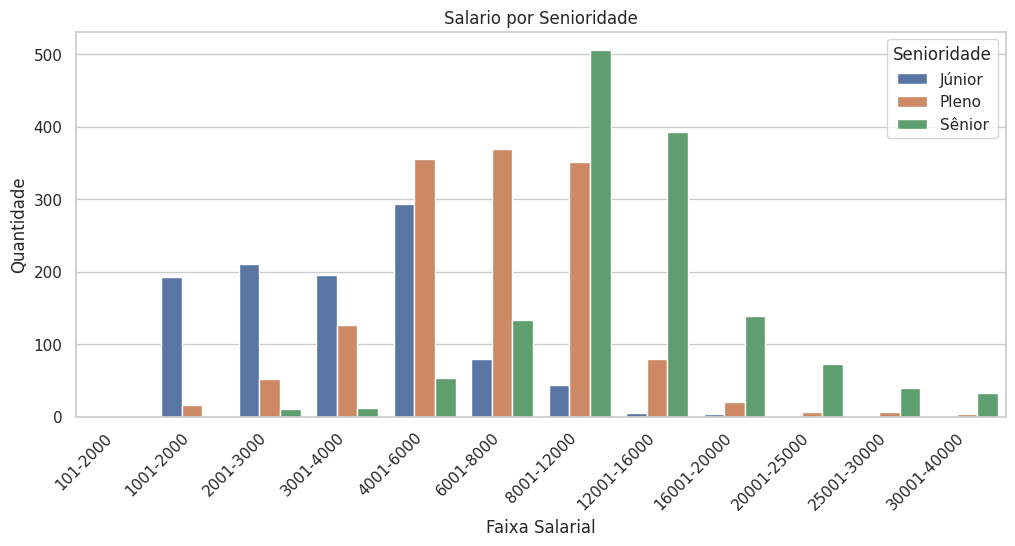

In [18]:
# Salario por Senioridade
plt.figure(figsize=(12, 5))
sns.countplot(x='Faixa salarial', hue='Nivel', data=df_main, order=salario_ordem, hue_order=nivel_ordem)
plt.title('Salario por Senioridade')
plt.xlabel('Faixa Salarial')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Senioridade')

# Exibe o grafico
plt.show()


Podemos ver que junior fica estavel entre 3 faixa e se destacando na de 4001-6000, enquanto pleno fica estavel em 3 faixas de salario, entre 4001 e 12000 e senior, com uma volumetria significativa e partir de 8001-12000.

Calculo para pegar media de salario pro senioridade

In [19]:
#Extra o valor medio da faixa salarial
def salario_medio(faixa_salarial):
    #Pega os valores e converte em int
    numeros = list(map(int, re.findall(r'\d+', faixa_salarial)))
  #calculo de media
    return sum(numeros) / len(numeros) if numeros else float('nan')

#Aplica a função na coluna 'Faixa salarial' e cria coluna 'Salario Medio'
df_main['Salario Medio'] = df_main['Faixa salarial'].apply(salario_medio)

# Calcular a média salarial por senioridade
med_salario_senioridade = df_main.groupby('Nivel')['Salario Medio'].mean()

print(med_salario_senioridade)



Nivel
Júnior     3982.482422
Pleno      7500.860490
Sênior    13084.491385
Name: Salario Medio, dtype: float64


##### Media salarial por senioridade

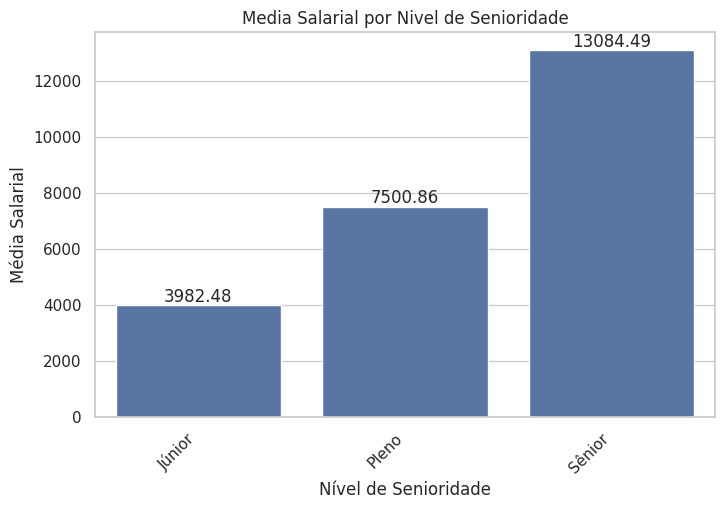

In [20]:

#Media salarial por senioridade

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=med_salario_senioridade.index, y=med_salario_senioridade.values)
ax.bar_label(ax.containers[0], fmt='%.2f')  #Adicionando rotulos de dados
plt.title('Media Salarial por Nivel de Senioridade')
plt.xlabel('Nível de Senioridade')
plt.ylabel('Média Salarial')
plt.xticks(rotation=45, ha='right')

plt.show()

##### Moda de salario por senioridade

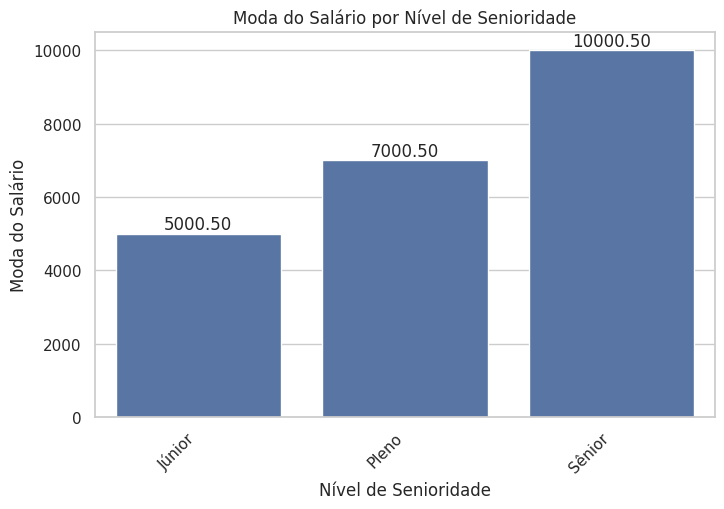

In [21]:
#Calculando a moda do salario por senioridade
moda_salario_senioridade = df_main.groupby('Nivel')['Salario Medio'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

#Moda salario por senioridade
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=moda_salario_senioridade.index, y=moda_salario_senioridade.values)
ax.bar_label(ax.containers[0], fmt='%.2f')

plt.title('Moda do Salário por Nível de Senioridade')
plt.xlabel('Nível de Senioridade')
plt.ylabel('Moda do Salário')
plt.xticks(rotation=45, ha='right')

plt.show()

##### Outlier de salarios por senioridade

<Figure size 1000x600 with 0 Axes>

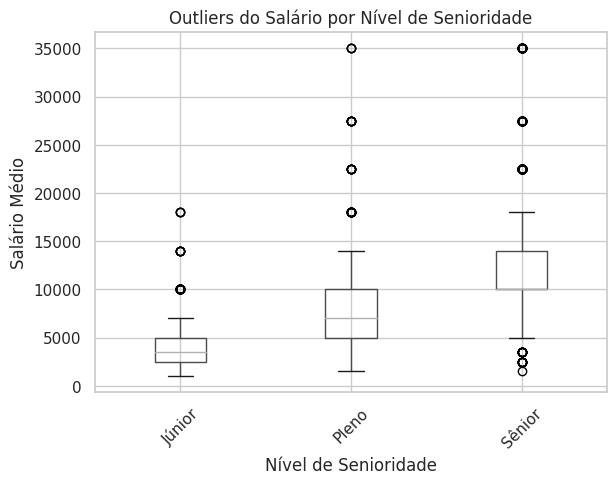

In [22]:
#Outliers de salarios por senioridade
plt.figure(figsize=(10, 6))
df_main.boxplot(column='Salario Medio', by='Nivel', grid=True)

plt.title('Outliers do Salário por Nível de Senioridade')
plt.suptitle('')
plt.xlabel('Nível de Senioridade')
plt.ylabel('Salário Médio')
plt.xticks(rotation=45)
plt.show()

Conforme o nível de senioridade aumenta, os salários médios também aumentam, mas há maior variabilidade e presença de outliers, especialmente nos níveis Pleno e Sênior, indicando dispersão salarial significativa nesses grupos.